Study on the relationship between proton $\texttt{VertexFitter}$ ("standard") and $\texttt{DecayTreeFitter}$ momenta, with focus on observed deviations in MC and data from the expected direct correlation.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors as mcolors
import h5py
import time

# Monte Carlo data

In [2]:
inputMC = 'data/LHCbMC_2016-2017-2018_MagUpDown_Lb2JPsiL_Ttracks_v12.h5'

In [3]:
tickMC = time.perf_counter()
df_reco = pd.read_hdf(inputMC, key='LHCbMC_Lb')
tockMC = time.perf_counter()
print(f"Monte Carlo imported in {tockMC - tickMC:0.4f} seconds.")
df_reco

Monte Carlo imported in 22.4006 seconds.


,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_PIDSubs_p_PY,DTF_FixJPsiLambda_PIDSubs_p_PZ,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,TrackType,MC_key
Rec_key,,,,,,,,,,,,,,,,,,,,,
0,0.952388,-0.165336,26.651770,402.777832,-229.470520,5536.814453,0.9524,-0.1653,26.652201,1910.136719,...,-186.566345,5411.963379,-804.469727,-535.944397,22858.960938,1438.071777,1619.347290,23634.302734,T,0
1,0.845292,-0.195122,3.622388,139.395874,322.585419,7428.522461,0.8453,-0.1950,3.620400,481.652618,...,222.666214,4137.976074,-605.608093,594.454895,11170.495117,71.893692,-2873.631348,73489.484375,T,29
2,-0.480003,-0.762014,18.670696,-819.340149,-626.124390,5389.564453,-0.4801,-0.7620,18.671101,-5395.257812,...,-323.442810,2628.927246,4.108163,-790.314697,5651.807129,-5579.078613,-431.151581,23151.667969,T,69
3,1.681797,-2.255294,-36.569271,113.645294,-329.222229,4678.392090,1.6818,-2.2553,-36.569199,7835.708984,...,-1702.511353,24506.517578,8712.822266,-18033.572266,231397.500000,336.531647,-3496.248779,45100.238281,T,119
4,0.824895,-0.252737,74.871048,-100.702072,60.565861,6466.218750,0.8242,-0.2542,74.883598,-74.406654,...,135.662018,8106.856445,-3448.149902,-1045.294434,90591.554688,588.637329,239.301941,10912.332031,T,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366391,0.964920,0.161698,-12.157676,293.129822,39.016293,7097.797363,0.9649,0.1621,-12.151800,3175.616943,...,-18.306223,7767.518555,1504.345581,715.472656,49351.718750,-112.221489,2933.706299,37641.914062,T,8921673
366392,-0.498788,1.215896,21.856564,-176.847626,145.914993,8691.596680,-0.5001,1.2166,21.869101,-2664.720215,...,-50.586430,-2812.631592,-3547.666504,1885.741577,33505.289062,-1337.816284,1466.083374,45027.328125,T,8921702
366393,0.114458,-0.046962,25.276293,-29.465662,-15.364128,949.110657,0.1145,-0.0469,25.275400,-6107.898926,...,-133.646973,15975.192383,-3526.683594,-343.335175,44636.988281,-3534.635254,-3121.734619,91762.195312,T,8921772


In [4]:
list(df_reco)

['Lb_ENDVERTEX_X',
 'Lb_ENDVERTEX_Y',
 'Lb_ENDVERTEX_Z',
 'L_ENDVERTEX_X',
 'L_ENDVERTEX_Y',
 'L_ENDVERTEX_Z',
 'Jpsi_ENDVERTEX_X',
 'Jpsi_ENDVERTEX_Y',
 'Jpsi_ENDVERTEX_Z',
 'L_PX',
 'L_PY',
 'L_PZ',
 'Lb_PX',
 'Lb_PY',
 'Lb_PZ',
 'Jpsi_PX',
 'Jpsi_PY',
 'Jpsi_PZ',
 'p_PX',
 'p_PY',
 'p_PZ',
 'pim_PX',
 'pim_PY',
 'pim_PZ',
 'mum_PX',
 'mum_PY',
 'mum_PZ',
 'mup_PX',
 'mup_PY',
 'mup_PZ',
 'L_M',
 'L_MM',
 'Lb_M',
 'Lb_MM',
 'Jpsi_M',
 'Jpsi_MM',
 'Lb_BPVDIRA',
 'Lb_BPVIPCHI2',
 'Lb_BPVVDCHI2',
 'Lb_VFASPF_CHI2_VDOF',
 'L_BPVDIRA',
 'L_BPVIPCHI2',
 'L_BPVVDCHI2',
 'L_VFASPF_CHI2_VDOF',
 'Lb_OWNPV_X',
 'Lb_OWNPV_Y',
 'Lb_OWNPV_Z',
 'Lb_OWNPV_CHI2',
 'Lb_OWNPV_NDOF',
 'L_ID',
 'Lb_ID',
 'Jpsi_ID',
 'p_ID',
 'pim_ID',
 'mum_ID',
 'mup_ID',
 'DTF_FixJPsi_status',
 'DTF_FixJPsi_Lb_M',
 'DTF_FixJPsi_Lb_P',
 'DTF_FixJPsi_chi2',
 'DTF_FixJPsi_nDOF',
 'DTF_FixJPsi_PV_key',
 'DTF_FixJPsi_PV_X',
 'DTF_FixJPsi_PV_Y',
 'DTF_FixJPsi_PV_Z',
 'DTF_FixJPsi_L_M',
 'DTF_FixJPsi_L_P',
 'DTF_FixJPsi_L_dec

In [5]:
tickMCTruth = time.perf_counter()
df_truth = pd.read_hdf(inputMC, key='LHCbMCTruth_Lb')
tockMCTruth = time.perf_counter()
print(f"Monte Carlo Truth imported in {tockMCTruth - tickMCTruth:0.4f} seconds.")
df_truth

Monte Carlo Truth imported in 53.4764 seconds.


,MCTRUTH_Lb_ENDVERTEX_X,MCTRUTH_Lb_ENDVERTEX_Y,MCTRUTH_Lb_ENDVERTEX_Z,MCTRUTH_L_ENDVERTEX_X,MCTRUTH_L_ENDVERTEX_Y,MCTRUTH_L_ENDVERTEX_Z,MCTRUTH_p_PX,MCTRUTH_p_PY,MCTRUTH_p_PZ,MCTRUTH_pim_PX,...,mup_PP_X,mup_PP_Y,mup_PP_Z,mup_PP_PX,mup_PP_PY,mup_PP_PZ,mup_PP_Weight,Rec_key,N_rec_matches,TrackType
MC_key,,,,,,,,,,,,,,,,,,,,,
0,0.9512,-0.1669,26.401600,343.742889,-192.429398,4751.548828,2031.640015,-1218.119995,29336.890625,445.510010,...,0.6208,-0.5355,21.231701,1448.819824,1628.266357,23763.910156,0.975000,0,1,T
1,0.4619,-0.3471,-52.081200,-19.765400,-33.384300,45.136002,-1190.050049,-1817.560059,5618.410156,-125.169998,...,0.2795,-0.4641,-50.938000,-3430.944092,-2054.681885,20444.863281,1.000000,-1,0,NA
2,0.8623,-0.0693,39.078201,145.114395,-70.015701,2563.685059,1349.000000,-574.190002,22276.189453,239.940002,...,0.1603,-0.3852,34.265598,1869.628418,869.200012,13080.188477,1.000000,-1,0,NA
3,0.8441,-0.1694,17.714300,-9.207400,27.546700,3520.887207,-295.320007,790.229980,93841.296875,3.170000,...,0.4994,-0.5171,14.525300,491.177612,513.784912,5034.924805,1.000000,-1,0,NA
4,0.6610,-0.4327,7.083600,-23.592199,-54.290798,201.384293,-1843.489990,-4303.959961,15525.910156,-361.470001,...,-0.0085,-0.3661,9.187500,-2067.989014,93.588974,6374.103027,1.000000,-1,0,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921810,0.7382,-0.1062,0.347100,-2.454600,0.459400,68.980499,-1052.079956,169.649994,21721.480469,-270.470001,...,0.5466,-0.3809,3.584800,-1646.731689,-2497.763672,30773.214844,0.942857,-1,0,NA
8921811,0.6401,-0.0814,27.420200,4.920900,-10.475100,58.229698,680.200012,-1542.880005,4852.310059,153.279999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,NA
8921812,2.0908,-1.0901,46.602200,36.268501,-29.632999,1175.768677,4569.680176,-3904.929932,153438.671875,582.070007,...,0.3603,0.4048,30.488100,1073.656860,-936.144836,10031.811523,0.975000,-1,0,NA


In [6]:
list(df_truth)

['MCTRUTH_Lb_ENDVERTEX_X',
 'MCTRUTH_Lb_ENDVERTEX_Y',
 'MCTRUTH_Lb_ENDVERTEX_Z',
 'MCTRUTH_L_ENDVERTEX_X',
 'MCTRUTH_L_ENDVERTEX_Y',
 'MCTRUTH_L_ENDVERTEX_Z',
 'MCTRUTH_p_PX',
 'MCTRUTH_p_PY',
 'MCTRUTH_p_PZ',
 'MCTRUTH_pim_PX',
 'MCTRUTH_pim_PY',
 'MCTRUTH_pim_PZ',
 'MCTRUTH_mum_PX',
 'MCTRUTH_mum_PY',
 'MCTRUTH_mum_PZ',
 'MCTRUTH_mup_PX',
 'MCTRUTH_mup_PY',
 'MCTRUTH_mup_PZ',
 'MCTRUTH_Lb_ID',
 'MCTRUTH_L_ID',
 'Lb_Reconstructible',
 'Lb_Reconstructed',
 'L_Reconstructible',
 'L_Reconstructed',
 'Jpsi_Reconstructible',
 'Jpsi_Reconstructed',
 'p_Reconstructible',
 'p_Reconstructed',
 'pim_Reconstructible',
 'pim_Reconstructed',
 'mum_Reconstructible',
 'mum_Reconstructed',
 'mup_Reconstructible',
 'mup_Reconstructed',
 'p_PP_X',
 'p_PP_Y',
 'p_PP_Z',
 'p_PP_PX',
 'p_PP_PY',
 'p_PP_PZ',
 'p_PP_Weight',
 'pim_PP_X',
 'pim_PP_Y',
 'pim_PP_Z',
 'pim_PP_PX',
 'pim_PP_PY',
 'pim_PP_PZ',
 'pim_PP_Weight',
 'mum_PP_X',
 'mum_PP_Y',
 'mum_PP_Z',
 'mum_PP_PX',
 'mum_PP_PY',
 'mum_PP_PZ',
 'mum

In [7]:
tickMerge = time.perf_counter()
df_MC = pd.merge(df_truth.loc[df_truth['Rec_key'] >= 0], df_reco, left_index=True, right_on='MC_key')
tockMerge = time.perf_counter()
print(f"Monte Carlo merged in {tockMerge - tickMerge:0.4f} seconds.")

Monte Carlo merged in 3.0599 seconds.


In [8]:
df_MC = df_MC.loc[(df_MC['MC_key'] >= 0) & (df_MC['Rec_key'] >= 0)]

In [9]:
def MomentumModulus(px, py, pz):
    return np.sqrt(px**2 + py**2 + pz**2)

def TransverseMomentumModulus(px, py):
    return np.sqrt(px**2 + py**2)

In [10]:
JPsi1SPDGMass = 3096.900

PionPCuts = (MomentumModulus(df_MC['pim_PX'], df_MC['pim_PY'], df_MC['pim_PZ']) > 2000) & (MomentumModulus(df_MC['pim_PX'], df_MC['pim_PY'], df_MC['pim_PZ']) < 5e5)
ProtonPCuts = (MomentumModulus(df_MC['p_PX'], df_MC['p_PY'], df_MC['p_PZ']) > 10000) & (MomentumModulus(df_MC['p_PX'], df_MC['p_PY'], df_MC['p_PZ']) < 5e5)
ProtonPTCuts = TransverseMomentumModulus(df_MC['p_PX'], df_MC['p_PY']) > 400
## Combined m(p-pi)? Seems to be "AM" in the DaVinci opt file
LambdaMCuts = (df_MC['L_M'] > 600) & (df_MC['L_M'] < 1500)
LambdaMMCuts = df_MC['L_MM'] < 1500
LambdaZCuts = (df_MC['L_ENDVERTEX_Z'] > 5500) & (df_MC['L_ENDVERTEX_Z'] < 8500)
LambdaDiraCuts = (df_MC['L_BPVDIRA'] > 0.9999)
LambdaBPVIPCHI2Cuts = df_MC['L_BPVIPCHI2'] < 200
LambdaBPVVDCHI2Cuts = df_MC['L_BPVVDCHI2'] < 2e7
LambdaChi2Cuts = df_MC['L_VFASPF_CHI2_VDOF'] < 750
JPsiMCuts = abs(df_MC['Jpsi_M'] - JPsi1SPDGMass) < 90
LambdaPTCuts = TransverseMomentumModulus(df_MC['L_PX'], df_MC['L_PY']) > 450
## Combined m(JpsiLambda)? See comment above
LambdabMCuts = (df_MC['Lb_M'] < 8500)
LambdabDiraCuts = abs(df_MC['Lb_BPVDIRA']) > 0.99
LambdabBPVIPCHI2Cuts = df_MC['Lb_BPVIPCHI2'] < 1750
LambdabChi2Cuts = df_MC['Lb_VFASPF_CHI2_VDOF'] < 150

#DTFCuts = (df_MC['DTF_FixJPsiLambda_status'] == 'Success')

df_MC_Filtered = df_MC.loc[
    PionPCuts &
    ProtonPCuts &
    ProtonPTCuts &
    LambdaMCuts &
    LambdaMMCuts &
    LambdaZCuts &
    LambdaDiraCuts &
    LambdaBPVIPCHI2Cuts &
    LambdaBPVVDCHI2Cuts &
    LambdaChi2Cuts &
    JPsiMCuts &
    LambdaPTCuts &
    LambdabMCuts &
    LambdabDiraCuts &
    LambdabBPVIPCHI2Cuts &
    LambdabChi2Cuts
]

df_MC_Filtered

,MCTRUTH_Lb_ENDVERTEX_X,MCTRUTH_Lb_ENDVERTEX_Y,MCTRUTH_Lb_ENDVERTEX_Z,MCTRUTH_L_ENDVERTEX_X,MCTRUTH_L_ENDVERTEX_Y,MCTRUTH_L_ENDVERTEX_Z,MCTRUTH_p_PX,MCTRUTH_p_PY,MCTRUTH_p_PZ,MCTRUTH_pim_PX,...,DTF_FixJPsiLambda_PIDSubs_p_PY,DTF_FixJPsiLambda_PIDSubs_p_PZ,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,TrackType_y,MC_key
Rec_key,,,,,,,,,,,,,,,,,,,,,
0,0.9512,-0.1669,26.401600,343.742889,-192.429398,4751.548828,2031.640015,-1218.119995,29336.890625,445.510010,...,-186.566345,5411.963379,-804.469727,-535.944397,22858.960938,1438.071777,1619.347290,23634.302734,T,0
1,0.8237,-0.2123,3.514200,140.238602,325.837311,7463.102539,367.250000,1035.959961,24602.169922,174.279999,...,222.666214,4137.976074,-605.608093,594.454895,11170.495117,71.893692,-2873.631348,73489.484375,T,29
8,0.5442,-0.4049,-30.064199,-237.463104,-161.438004,5029.397461,-1999.180054,-1447.800049,43812.398438,-599.280029,...,-151.918823,7139.517578,100.262436,999.515259,50033.699219,-120.737198,-995.344788,6822.337402,T,277
14,0.9904,-0.2075,-9.769600,224.561996,56.081600,5921.048828,2894.560059,699.140015,74302.851562,293.929993,...,104.645416,10220.954102,-884.967468,195.843964,34903.839844,1645.699585,-1113.117432,24484.212891,T,367
17,0.8236,-0.2738,28.986401,-296.374695,-100.123802,5963.561523,-1268.760010,-522.340027,25478.310547,-184.460007,...,20.153040,3543.737305,-829.315674,-926.117676,37815.328125,2614.833252,-1553.520630,63936.839844,T,493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366374,1.9930,-0.9682,33.883499,454.162109,-444.944794,6047.499512,7053.950195,-6800.229980,92633.132812,949.369995,...,-1059.302368,13806.107422,2310.392578,-2437.838867,42988.765625,2057.492432,-877.707703,10357.686523,T,8921400
366378,1.2187,-0.0757,-10.080700,120.471603,-69.038300,7221.361328,1256.689941,-628.059998,71476.546875,189.229996,...,-259.237457,19192.976562,1663.037476,477.534760,14450.500000,-812.013245,-604.744568,27734.162109,T,8921503
366382,1.1575,-0.3940,43.910599,4.075100,-146.877396,7409.937500,133.949997,-2934.969971,147684.812500,-69.339996,...,-295.752747,15403.834961,196.509079,-679.625732,6668.261719,3547.472900,-3286.872803,190998.375000,T,8921603


For this study it's also useful to have a data frame with the *reverse* pre-selection filters on $z_\Lambda^{vtx}$, i.e. $z_\Lambda^{vtx} \notin [5.5,8.5]\,\text{m}$.

In [11]:
df_MC_ReverseFiltered = df_MC.loc[
    PionPCuts &
    ProtonPCuts &
    ProtonPTCuts &
    LambdaMCuts &
    LambdaMMCuts &
    ~LambdaZCuts &
    LambdaDiraCuts &
    LambdaBPVIPCHI2Cuts &
    LambdaBPVVDCHI2Cuts &
    LambdaChi2Cuts &
    JPsiMCuts &
    LambdaPTCuts &
    LambdabMCuts &
    LambdabDiraCuts &
    LambdabBPVIPCHI2Cuts &
    LambdabChi2Cuts
]

df_MC_ReverseFiltered

,MCTRUTH_Lb_ENDVERTEX_X,MCTRUTH_Lb_ENDVERTEX_Y,MCTRUTH_Lb_ENDVERTEX_Z,MCTRUTH_L_ENDVERTEX_X,MCTRUTH_L_ENDVERTEX_Y,MCTRUTH_L_ENDVERTEX_Z,MCTRUTH_p_PX,MCTRUTH_p_PY,MCTRUTH_p_PZ,MCTRUTH_pim_PX,...,DTF_FixJPsiLambda_PIDSubs_p_PY,DTF_FixJPsiLambda_PIDSubs_p_PZ,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,TrackType_y,MC_key
Rec_key,,,,,,,,,,,,,,,,,,,,,
2,-0.4798,-0.7758,18.706800,-785.810974,-591.072998,5157.507812,-5172.310059,-3904.530029,34147.730469,-470.119995,...,-323.442810,2628.927246,4.108163,-790.314697,5651.807129,-5579.078613,-431.151581,23151.667969,T,69
6,1.4535,-2.4234,28.421700,-86.977303,80.339996,4303.567871,-348.470001,410.820007,16413.980469,-69.480003,...,-140.895035,3540.618652,2585.049805,-3631.321777,69190.242188,-500.713501,-2420.037598,23901.339844,T,249
7,-0.0398,-0.0673,5.665700,-249.259796,-139.331497,4827.745117,-1509.760010,-841.409973,29903.369141,-513.349976,...,-99.415855,2396.487549,-2690.455322,-383.660095,27116.511719,-1564.496460,2457.933105,24390.025391,T,254
10,1.6627,-0.7055,36.293701,552.021912,-324.502899,5087.420898,6835.500000,-4024.709961,62359.808594,513.340027,...,-333.611084,5377.048340,1567.251465,-758.257324,7613.171387,68.653038,-992.793518,28791.912109,T,294
16,0.7616,0.1385,60.089298,178.766403,236.599792,5133.236328,957.520020,1217.900024,27974.169922,263.040009,...,2494.197754,18.254213,-2006.125610,-786.037903,56535.238281,578.693542,908.231018,14183.281250,T,477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366377,0.8986,0.0664,-64.150597,103.414497,-365.230804,4423.674805,868.140015,-3108.899902,38097.000000,61.939999,...,-199.499817,2611.964355,-1961.999878,-1919.188965,14625.916992,1187.196167,-922.675598,9864.327148,T,8921483
366379,1.3080,-0.2236,29.990299,40.800900,-220.110992,3055.719727,197.210007,-1657.849976,22327.990234,147.539993,...,-259.398682,4202.135254,1493.630371,-1359.871582,21473.326172,2055.667236,537.266724,7459.156250,T,8921512
366385,1.4790,1.6164,117.685402,-145.718094,413.124207,5320.206543,-614.000000,1525.500000,20376.880859,-94.570000,...,872.621521,6525.260254,422.257202,1391.818848,10209.554688,3263.925293,3659.025146,96178.812500,T,8921644


# Real data
Will implement full dataset when I find 40.5GiB under a tree

In [12]:
inputData = 'data/Custom_Shuffled5e5_LHCbData_2016_MagUpDown_Dimuon_Ttracks.h5'

In [13]:
tickData = time.perf_counter()
df_Data = pd.read_hdf(inputData, key='LHCbData')
tockData = time.perf_counter()
print(f"Data imported found in {tockData - tickData:0.4f} seconds.")
df_Data

Data imported found in 27.9945 seconds.


,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_PIDSubs_PV_key,DTF_FixJPsiLambda_PIDSubs_PV_X,DTF_FixJPsiLambda_PIDSubs_PV_Y,DTF_FixJPsiLambda_PIDSubs_PV_Z,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ
0,0.741083,0.040052,51.522447,-183.292384,-43.859362,6490.082515,0.7439,0.0407,51.4959,-1962.289750,...,0.0,0.8736,-0.1967,48.166500,309.563354,-408.524475,34743.472656,-2211.389404,-110.629265,20956.490234
1,0.966530,1.056296,12.180388,460.300083,66.834128,7770.100444,0.9662,1.0572,12.2043,1394.350564,...,0.0,0.8501,-0.2092,-26.982300,1596.628906,3514.845459,104168.757812,-880.160461,658.744263,13403.822266
2,0.966233,1.057736,12.214956,-57.917475,-84.071053,5993.154473,0.9662,1.0572,12.2043,-428.321594,...,0.0,0.8501,-0.2092,-26.982300,1700.060669,3381.554932,100243.195312,-873.159973,657.834717,13182.185547
3,0.823661,0.118355,46.132318,618.389668,168.951341,7355.920185,0.8241,0.1180,46.1314,1451.342628,...,0.0,0.7951,-0.1776,44.437199,-1076.289917,1566.036987,8062.599609,2149.493652,2015.187012,11564.797852
4,1.115657,-0.125374,16.776287,238.067626,64.113430,7681.684115,1.1156,-0.1256,16.7798,2399.018104,...,0.0,0.8308,-0.2088,-5.163700,1367.081787,74.007980,38234.714844,-1429.765259,-1237.681396,38150.023438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502109,0.846524,-0.134417,32.394226,-64.169224,6.479162,5770.951530,0.8465,-0.1340,32.3945,-584.392519,...,0.0,0.8459,-0.1883,32.926998,556.332214,-1148.651367,10566.268555,512.927612,1943.064453,10574.164062
502110,0.871183,-0.286051,41.685312,34.181050,-103.878831,6986.884965,0.8709,-0.2864,41.6887,421.292007,...,0.0,0.8218,-0.2298,36.771099,445.235138,-514.793945,17956.791016,-2666.400391,-2992.653564,30364.205078
502111,0.870582,-0.286811,41.692622,-452.733867,61.078171,5891.824125,0.8709,-0.2864,41.6887,-3363.159232,...,0.0,0.8218,-0.2298,36.771099,468.523468,-513.491150,17915.718750,-2619.216064,-2997.929932,30253.095703
502112,-0.402430,-1.233937,-36.036206,-60.702877,89.445117,7273.999982,-0.3998,-1.2317,-36.0552,91.685951,...,0.0,0.8815,-0.2150,-45.118000,-9281.548828,-5284.185059,58504.699219,-1797.508667,-2812.620850,22225.533203


# Data analysis

## Monte Carlo "extra bands" in proton VF vs. DTF

When plotting a scatterplot of $p_x^{VF}(p)$ vs. $p_x^{DTF}(p)$, something weird happens.

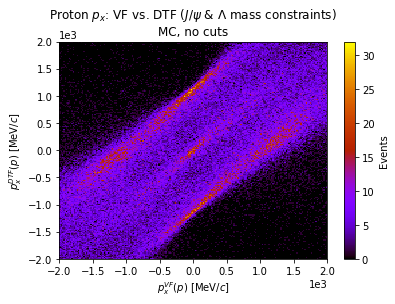

In [14]:
plt.hist2d(df_MC['p_PX'], df_MC['DTF_FixJPsiLambda_p_PX'], bins=200, cmap='gnuplot',
          range=[[-2e3,2e3],[-2e3,2e3]])
plt.xlabel("$p_x^{VF}(p)$ [MeV/$c$]")
plt.ylabel("$p_x^{DTF}(p)$ [MeV/$c$]")
plt.title("Proton $p_x$: VF vs. DTF ($J/\psi$ & $\Lambda$ mass constraints)\nMC, no cuts")
plt.colorbar(label='Events')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

What happens when using just events $z_\Lambda^{vtx} \notin [5.5,8.5]\,\text{m}$?

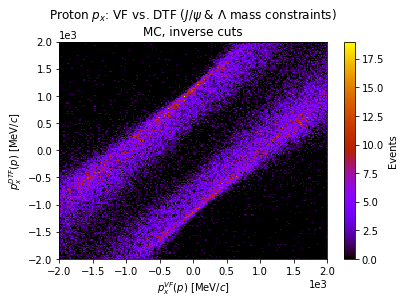

In [15]:
plt.hist2d(df_MC_ReverseFiltered['p_PX'], df_MC_ReverseFiltered['DTF_FixJPsiLambda_p_PX'], bins=200, cmap='gnuplot',
          range=[[-2e3,2e3],[-2e3,2e3]])
plt.xlabel("$p_x^{VF}(p)$ [MeV/$c$]")
plt.ylabel("$p_x^{DTF}(p)$ [MeV/$c$]")
plt.title("Proton $p_x$: VF vs. DTF ($J/\psi$ & $\Lambda$ mass constraints)\nMC, inverse cuts")
plt.colorbar(label='Events')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

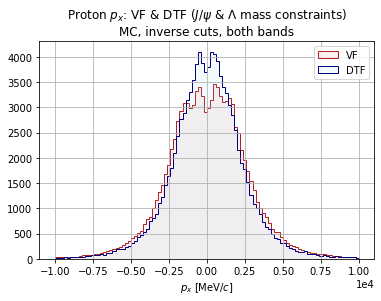

In [16]:
bins=100
rng=(-1e4,1e4)

plt.hist(df_MC_ReverseFiltered['p_PX'],
         bins=bins, range=rng,
         histtype='stepfilled',
         edgecolor='firebrick',
         color=mcolors.to_rgba('lightcoral', alpha=0.1),
         label='VF'
)

plt.hist(df_MC_ReverseFiltered['DTF_FixJPsiLambda_p_PX'],
         bins=bins, range=rng,
         histtype='stepfilled',
         edgecolor='navy',
         color=mcolors.to_rgba('skyblue', alpha=0.1),
         label='DTF'
)

plt.grid()
#plt.yscale('log')
plt.xlabel("$p_x$ [MeV/$c$]")
plt.title("Proton $p_x$: VF & DTF ($J/\psi$ & $\Lambda$ mass constraints)\nMC, inverse cuts, both bands")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend()
plt.show()

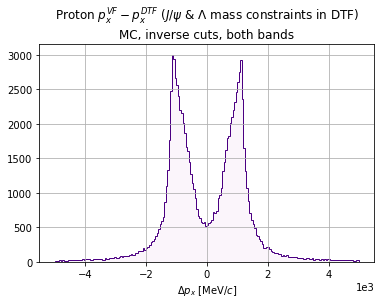

In [17]:
plt.hist(df_MC_ReverseFiltered['p_PX'] - df_MC_ReverseFiltered['DTF_FixJPsiLambda_p_PX'],
         range=(-5000,5000), bins=200,
         histtype='stepfilled',
         edgecolor='indigo',
         color=mcolors.to_rgba('plum', alpha=0.1)
)
plt.grid()
plt.xlabel("$\Delta p_x$ [MeV/$c$]")
plt.title("Proton $p_x^{VF} - p_x^{DTF}$ ($J/\psi$ & $\Lambda$ mass constraints in DTF)\nMC, inverse cuts, both bands")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.show()

Let's try to select the bands.

In [18]:
df_MC_ReverseFiltered_Right = df_MC_ReverseFiltered.loc[
    df_MC_ReverseFiltered['p_PX'] - df_MC_ReverseFiltered['DTF_FixJPsiLambda_p_PX'] > 0
]

df_MC_ReverseFiltered_Left = df_MC_ReverseFiltered.loc[
    df_MC_ReverseFiltered['p_PX'] - df_MC_ReverseFiltered['DTF_FixJPsiLambda_p_PX'] < 0
]

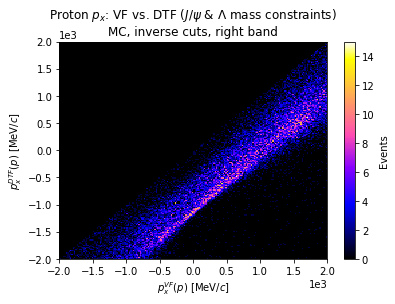

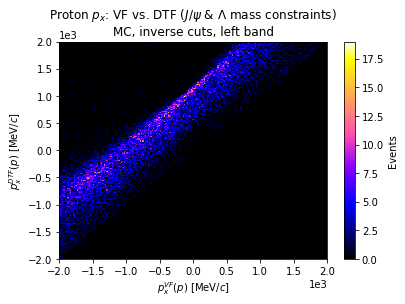

In [19]:
plt.hist2d(df_MC_ReverseFiltered_Right['p_PX'], df_MC_ReverseFiltered_Right['DTF_FixJPsiLambda_p_PX'], bins=200, cmap='gnuplot2',
          range=[[-2e3,2e3],[-2e3,2e3]])
plt.xlabel("$p_x^{VF}(p)$ [MeV/$c$]")
plt.ylabel("$p_x^{DTF}(p)$ [MeV/$c$]")
plt.title("Proton $p_x$: VF vs. DTF ($J/\psi$ & $\Lambda$ mass constraints)\nMC, inverse cuts, right band")
plt.colorbar(label='Events')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

plt.hist2d(df_MC_ReverseFiltered_Left['p_PX'], df_MC_ReverseFiltered_Left['DTF_FixJPsiLambda_p_PX'], bins=200, cmap='gnuplot2',
          range=[[-2e3,2e3],[-2e3,2e3]])
plt.xlabel("$p_x^{VF}(p)$ [MeV/$c$]")
plt.ylabel("$p_x^{DTF}(p)$ [MeV/$c$]")
plt.title("Proton $p_x$: VF vs. DTF ($J/\psi$ & $\Lambda$ mass constraints)\nMC, inverse cuts, left band")
plt.colorbar(label='Events')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

## Left-right bands comparisons

### General momenta distributions

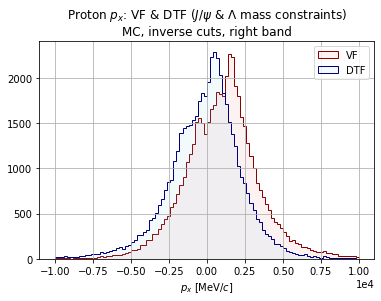

In [20]:
bins=100
rng=(-1e4,1e4)

plt.hist(df_MC_ReverseFiltered_Right['p_PX'],
         bins=bins, range=rng,
         histtype='stepfilled',
         edgecolor='darkred',
         color=mcolors.to_rgba('lightcoral', alpha=0.1),
         label='VF'
)

plt.hist(df_MC_ReverseFiltered_Right['DTF_FixJPsiLambda_p_PX'],
         bins=bins, range=rng,
         histtype='stepfilled',
         edgecolor='navy',
         color=mcolors.to_rgba('skyblue', alpha=0.1),
         label='DTF'
)

plt.grid()
#plt.yscale('log')
plt.xlabel("$p_x$ [MeV/$c$]")
plt.title("Proton $p_x$: VF & DTF ($J/\psi$ & $\Lambda$ mass constraints)\nMC, inverse cuts, right band")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend()
plt.show()

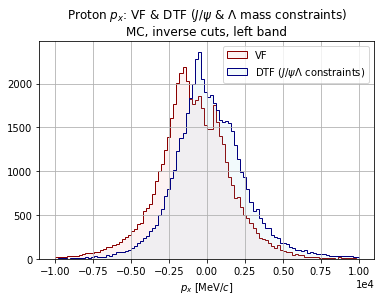

In [21]:
bins=100
rng=(-1e4,1e4)

plt.hist(df_MC_ReverseFiltered_Left['p_PX'],
         bins=bins, range=rng,
         histtype='stepfilled',
         edgecolor='darkred',
         color=mcolors.to_rgba('lightcoral', alpha=0.1),
         label='VF'
)

plt.hist(df_MC_ReverseFiltered_Left['DTF_FixJPsiLambda_p_PX'],
         bins=bins, range=rng,
         histtype='stepfilled',
         edgecolor='navy',
         color=mcolors.to_rgba('skyblue', alpha=0.1),
         label='DTF ($J/\psi \Lambda$ constraints)'
)

plt.grid()
#plt.yscale('log')
plt.xlabel("$p_x$ [MeV/$c$]")
plt.title("Proton $p_x$: VF & DTF ($J/\psi$ & $\Lambda$ mass constraints)\nMC, inverse cuts, left band")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend()
plt.show()

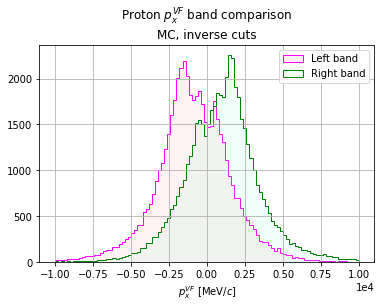

In [22]:
bins=100
rng=(-1e4,1e4)

plt.hist(df_MC_ReverseFiltered_Left['p_PX'],
         bins=bins, range=rng,
         histtype='stepfilled',
         edgecolor='fuchsia',
         color=mcolors.to_rgba('pink', alpha=0.2),
         label='Left band'
)

plt.hist(df_MC_ReverseFiltered_Right['p_PX'],
         bins=bins, range=rng,
         histtype='stepfilled',
         edgecolor='green',
         color=mcolors.to_rgba('aquamarine', alpha=0.1),
         label='Right band'
)

plt.grid()
#plt.yscale('log')
plt.xlabel("$p_x^{VF}$ [MeV/$c$]")
plt.title("Proton $p_x^{VF}$ band comparison\nMC, inverse cuts")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend()
plt.show()

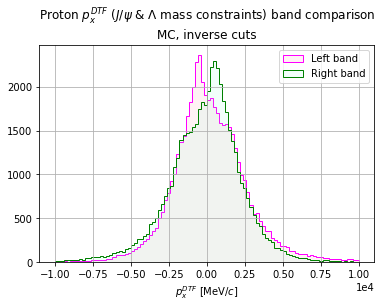

In [23]:
bins=100
rng=(-1e4,1e4)

plt.hist(df_MC_ReverseFiltered_Left['DTF_FixJPsiLambda_p_PX'],
         bins=bins, range=rng,
         histtype='stepfilled',
         edgecolor='fuchsia',
         color=mcolors.to_rgba('pink', alpha=0.2),
         label='Left band'
)

plt.hist(df_MC_ReverseFiltered_Right['DTF_FixJPsiLambda_p_PX'],
         bins=bins, range=rng,
         histtype='stepfilled',
         edgecolor='green',
         color=mcolors.to_rgba('aquamarine', alpha=0.1),
         label='Right band'
)

plt.grid()
#plt.yscale('log')
plt.xlabel("$p_x^{DTF}$ [MeV/$c$]")
plt.title("Proton $p_x^{DTF}$ ($J/\psi$ & $\Lambda$ mass constraints) band comparison\nMC, inverse cuts")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend()
plt.show()

### $\Lambda$ decay vertices

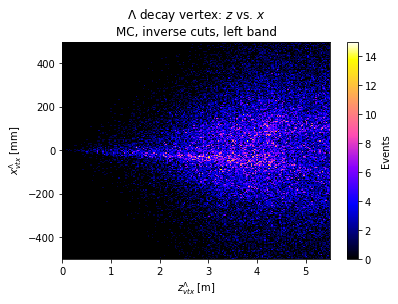

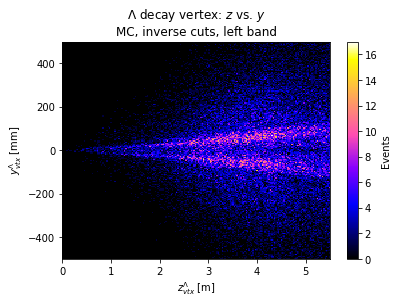

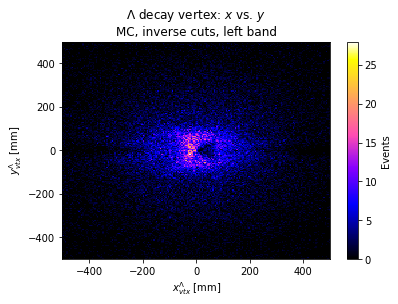

In [24]:
plt.hist2d(df_MC_ReverseFiltered_Left['L_ENDVERTEX_Z']/1000,
           df_MC_ReverseFiltered_Left['L_ENDVERTEX_X'],
           bins=200, range=[[0,5.5],[-500,500]],
           cmap='gnuplot2')
plt.xlabel("$z_{vtx}^\Lambda$ [m]")
plt.ylabel("$x_{vtx}^\Lambda$ [mm]")
plt.title('$\Lambda$ decay vertex: $z$ vs. $x$\nMC, inverse cuts, left band')
plt.colorbar(label='Events')
plt.show()

plt.hist2d(df_MC_ReverseFiltered_Left['L_ENDVERTEX_Z']/1000,
           df_MC_ReverseFiltered_Left['L_ENDVERTEX_Y'],
           bins=200, range=[[0,5.5],[-500,500]],
           cmap='gnuplot2')
plt.xlabel("$z_{vtx}^\Lambda$ [m]")
plt.ylabel("$y_{vtx}^\Lambda$ [mm]")
plt.title('$\Lambda$ decay vertex: $z$ vs. $y$\nMC, inverse cuts, left band')
plt.colorbar(label='Events')
plt.show()

plt.hist2d(df_MC_ReverseFiltered_Left['L_ENDVERTEX_X'],
           df_MC_ReverseFiltered_Left['L_ENDVERTEX_Y'],
           bins=200, range=[[-500,500],[-500,500]],
           cmap='gnuplot2')
plt.xlabel("$x_{vtx}^\Lambda$ [mm]")
plt.ylabel("$y_{vtx}^\Lambda$ [mm]")
plt.title('$\Lambda$ decay vertex: $x$ vs. $y$\nMC, inverse cuts, left band')
plt.colorbar(label='Events')
plt.show()

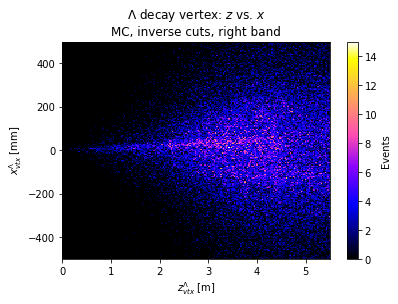

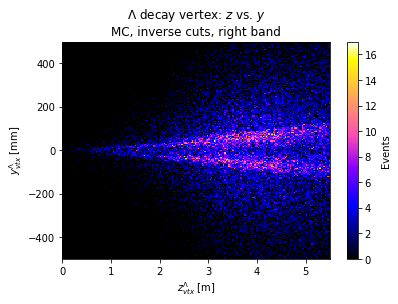

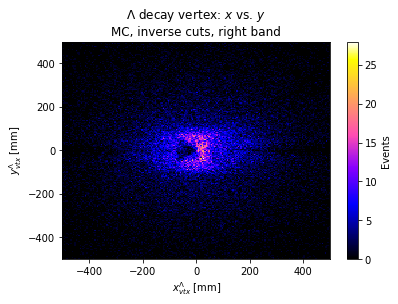

In [25]:
plt.hist2d(df_MC_ReverseFiltered_Right['L_ENDVERTEX_Z']/1000,
           df_MC_ReverseFiltered_Right['L_ENDVERTEX_X'],
           bins=200, range=[[0,5.5],[-500,500]],
           cmap='gnuplot2')
plt.xlabel("$z_{vtx}^\Lambda$ [m]")
plt.ylabel("$x_{vtx}^\Lambda$ [mm]")
plt.title('$\Lambda$ decay vertex: $z$ vs. $x$\nMC, inverse cuts, right band')
plt.colorbar(label='Events')
plt.show()

plt.hist2d(df_MC_ReverseFiltered_Right['L_ENDVERTEX_Z']/1000,
           df_MC_ReverseFiltered_Right['L_ENDVERTEX_Y'],
           bins=200, range=[[0,5.5],[-500,500]],
           cmap='gnuplot2')
plt.xlabel("$z_{vtx}^\Lambda$ [m]")
plt.ylabel("$y_{vtx}^\Lambda$ [mm]")
plt.title('$\Lambda$ decay vertex: $z$ vs. $y$\nMC, inverse cuts, right band')
plt.colorbar(label='Events')
plt.show()

plt.hist2d(df_MC_ReverseFiltered_Right['L_ENDVERTEX_X'],
           df_MC_ReverseFiltered_Right['L_ENDVERTEX_Y'],
           bins=200, range=[[-500,500],[-500,500]],
           cmap='gnuplot2')
plt.xlabel("$x_{vtx}^\Lambda$ [mm]")
plt.ylabel("$y_{vtx}^\Lambda$ [mm]")
plt.title('$\Lambda$ decay vertex: $x$ vs. $y$\nMC, inverse cuts, right band')
plt.colorbar(label='Events')
plt.show()

$\Lambda$ baryons decaying on the right side of the detector yield protons reconstructed with higher $p_x$ with VF than with DTF. Vice versa for baryons decaying on the left side.

## Data "spots" in proton VF vs. DTF

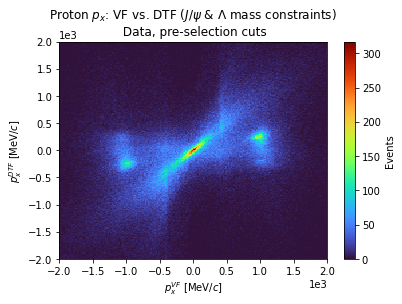

In [26]:
plt.hist2d(df_Data['p_PX'], df_Data['DTF_FixJPsiLambda_p_PX'], bins=200, cmap='turbo',
          range=[[-2e3,2e3],[-2e3,2e3]])
plt.xlabel("$p_x^{VF}$ [MeV/$c$]")
plt.ylabel("$p_x^{DTF}$ [MeV/$c$]")
plt.title("Proton $p_x$: VF vs. DTF ($J/\psi$ & $\Lambda$ mass constraints)\n Data, pre-selection cuts")
plt.colorbar(label='Events')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

In [27]:
leftSpotMask = (
    (df_Data['p_PX'] < -7.5e2)
    & (df_Data['p_PX'] > -1.5e3)
    & (df_Data['DTF_FixJPsiLambda_p_PX'] > -5e2)
    & (df_Data['DTF_FixJPsiLambda_p_PX'] < 5e2)
)

rightSpotMask = (
    (df_Data['p_PX'] > 7.5e2)
    & (df_Data['p_PX'] < 1.5e3)
    & (df_Data['DTF_FixJPsiLambda_p_PX'] > -5e2)
    & (df_Data['DTF_FixJPsiLambda_p_PX'] < 5e2)
)

### Both spots

In [28]:
df_Data_Spots = df_Data.loc[leftSpotMask | rightSpotMask]

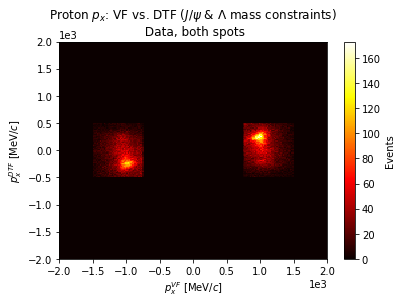

In [29]:
plt.hist2d(df_Data_Spots['p_PX'], df_Data_Spots['DTF_FixJPsiLambda_p_PX'], bins=200, cmap='hot',
          range=[[-2e3,2e3],[-2e3,2e3]])
plt.xlabel("$p_x^{VF}$ [MeV/$c$]")
plt.ylabel("$p_x^{DTF}$ [MeV/$c$]")
plt.title("Proton $p_x$: VF vs. DTF ($J/\psi$ & $\Lambda$ mass constraints)\n Data, both spots")
plt.colorbar(label='Events')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

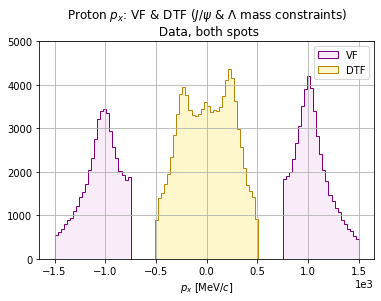

In [30]:
plt.hist(df_Data_Spots['p_PX'], bins=100,
         range=(-1.5e3,1.5e3),
         histtype='stepfilled',
         edgecolor='purple',
         color=mcolors.to_rgba('plum', alpha=0.2),
         label="VF")

plt.hist(df_Data_Spots['DTF_FixJPsiLambda_p_PX'],
         range=(-1.5e3,1.5e3), bins=100,
         histtype='stepfilled',
         edgecolor='darkgoldenrod',
         color=mcolors.to_rgba('gold', alpha=0.2),
         label="DTF")

plt.ylim((0,5000))
plt.grid()
plt.xlabel("$p_x$ [MeV/$c$]")
plt.title("Proton $p_x$: VF & DTF ($J/\psi$ & $\Lambda$ mass constraints)\n Data, both spots")
plt.legend()
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.show()

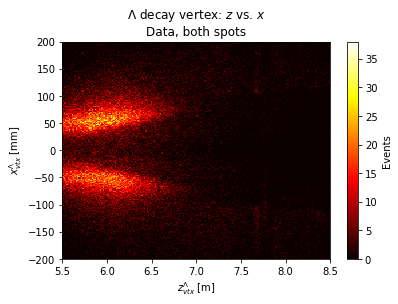

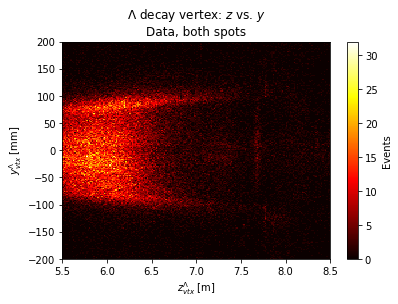

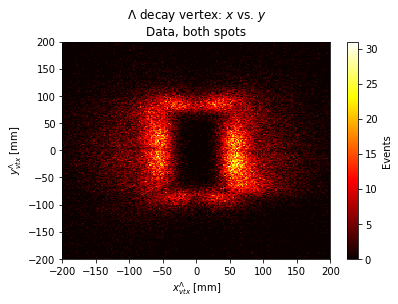

In [31]:
plt.hist2d(df_Data_Spots['L_ENDVERTEX_Z']/1000,
           df_Data_Spots['L_ENDVERTEX_X'],
           bins=200, range=[[5.5,8.5],[-200,200]],
           cmap='hot')
plt.xlabel("$z_{vtx}^\Lambda$ [m]")
plt.ylabel("$x_{vtx}^\Lambda$ [mm]")
plt.title('$\Lambda$ decay vertex: $z$ vs. $x$\nData, both spots')
plt.colorbar(label='Events')
plt.show()

plt.hist2d(df_Data_Spots['L_ENDVERTEX_Z']/1000,
           df_Data_Spots['L_ENDVERTEX_Y'],
           bins=200, range=[[5.5,8.5],[-200,200]],
           cmap='hot')
plt.xlabel("$z_{vtx}^\Lambda$ [m]")
plt.ylabel("$y_{vtx}^\Lambda$ [mm]")
plt.title('$\Lambda$ decay vertex: $z$ vs. $y$\nData, both spots')
plt.colorbar(label='Events')
plt.show()

plt.hist2d(df_Data_Spots['L_ENDVERTEX_X'],
           df_Data_Spots['L_ENDVERTEX_Y'],
           bins=200, range=[[-200,200],[-200,200]],
           cmap='hot')
plt.xlabel("$x_{vtx}^\Lambda$ [mm]")
plt.ylabel("$y_{vtx}^\Lambda$ [mm]")
plt.title('$\Lambda$ decay vertex: $x$ vs. $y$\nData, both spots')
plt.colorbar(label='Events')
plt.show()

### Left spot

In [32]:
df_Data_Spots_Left = df_Data.loc[leftSpotMask]
df_Data_Spots_Right = df_Data.loc[rightSpotMask]

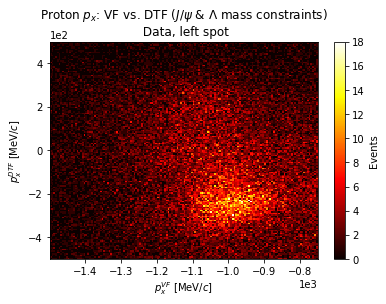

In [33]:
plt.hist2d(df_Data_Spots_Left['p_PX'], df_Data_Spots_Left['DTF_FixJPsiLambda_p_PX'], bins=150, cmap='hot')
plt.xlabel("$p_x^{VF}$ [MeV/$c$]")
plt.ylabel("$p_x^{DTF}$ [MeV/$c$]")
plt.title("Proton $p_x$: VF vs. DTF ($J/\psi$ & $\Lambda$ mass constraints)\n Data, left spot")
plt.colorbar(label='Events')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

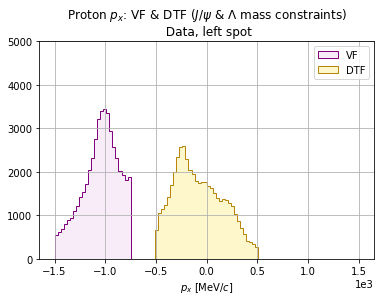

In [34]:
plt.hist(df_Data_Spots_Left['p_PX'], bins=100,
         range=(-1.5e3,1.5e3),
         histtype='stepfilled',
         edgecolor='purple',
         color=mcolors.to_rgba('plum', alpha=0.2),
         label="VF")

plt.hist(df_Data_Spots_Left['DTF_FixJPsiLambda_p_PX'], bins=100,
         range=(-1.5e3,1.5e3),
         histtype='stepfilled',
         edgecolor='darkgoldenrod',
         color=mcolors.to_rgba('gold', alpha=0.2),
         label="DTF")

plt.ylim((0,5000))
plt.grid()
plt.xlabel("$p_x$ [MeV/$c$]")
plt.title("Proton $p_x$: VF & DTF ($J/\psi$ & $\Lambda$ mass constraints)\n Data, left spot")
plt.legend()
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.show()

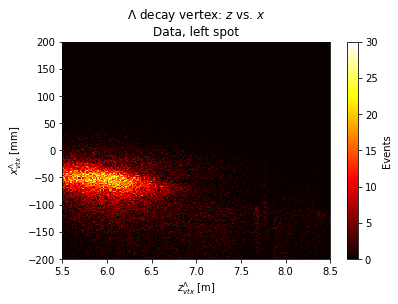

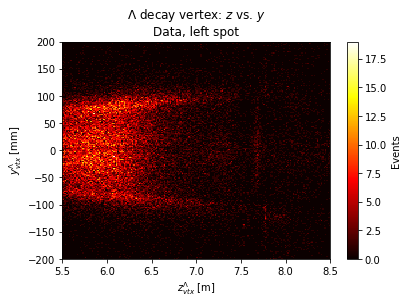

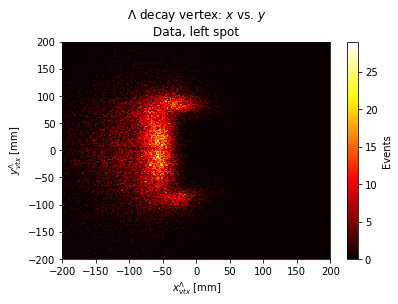

In [35]:
plt.hist2d(df_Data_Spots_Left['L_ENDVERTEX_Z']/1000,
           df_Data_Spots_Left['L_ENDVERTEX_X'],
           bins=200, range=[[5.5,8.5],[-200,200]],
           cmap='hot')
plt.xlabel("$z_{vtx}^\Lambda$ [m]")
plt.ylabel("$x_{vtx}^\Lambda$ [mm]")
plt.title('$\Lambda$ decay vertex: $z$ vs. $x$\nData, left spot')
plt.colorbar(label='Events')
plt.show()

plt.hist2d(df_Data_Spots_Left['L_ENDVERTEX_Z']/1000,
           df_Data_Spots_Left['L_ENDVERTEX_Y'],
           bins=200, range=[[5.5,8.5],[-200,200]],
           cmap='hot')
plt.xlabel("$z_{vtx}^\Lambda$ [m]")
plt.ylabel("$y_{vtx}^\Lambda$ [mm]")
plt.title('$\Lambda$ decay vertex: $z$ vs. $y$\nData, left spot')
plt.colorbar(label='Events')
plt.show()

plt.hist2d(df_Data_Spots_Left['L_ENDVERTEX_X'],
           df_Data_Spots_Left['L_ENDVERTEX_Y'],
           bins=200, range=[[-200,200],[-200,200]],
           cmap='hot')
plt.xlabel("$x_{vtx}^\Lambda$ [mm]")
plt.ylabel("$y_{vtx}^\Lambda$ [mm]")
plt.title('$\Lambda$ decay vertex: $x$ vs. $y$\nData, left spot')
plt.colorbar(label='Events')
plt.show()

### Right spot

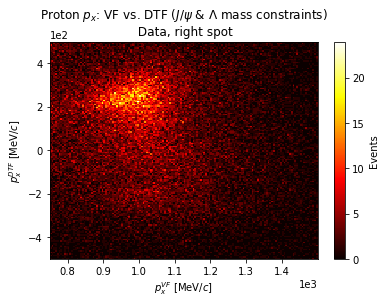

In [36]:
plt.hist2d(df_Data_Spots_Right['p_PX'], df_Data_Spots_Right['DTF_FixJPsiLambda_p_PX'], bins=150, cmap='hot')
plt.xlabel("$p_x^{VF}$ [MeV/$c$]")
plt.ylabel("$p_x^{DTF}$ [MeV/$c$]")
plt.title("Proton $p_x$: VF vs. DTF ($J/\psi$ & $\Lambda$ mass constraints)\n Data, right spot")
plt.colorbar(label='Events')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

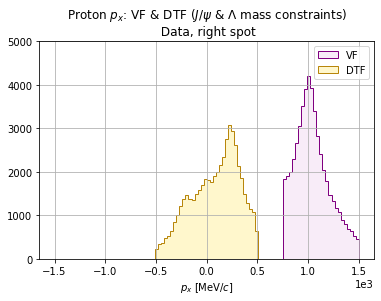

In [37]:
plt.hist(df_Data_Spots_Right['p_PX'], bins=100,
         range=(-1.5e3,1.5e3),
         histtype='stepfilled',
         edgecolor='purple',
         color=mcolors.to_rgba('plum', alpha=0.2),
         label="VF")

plt.hist(df_Data_Spots_Right['DTF_FixJPsiLambda_p_PX'], bins=100,
         range=(-1.5e3,1.5e3),
         histtype='stepfilled',
         edgecolor='darkgoldenrod',
         color=mcolors.to_rgba('gold', alpha=0.2),
         label="DTF")

plt.ylim(0,5000)
plt.grid()
plt.xlabel("$p_x$ [MeV/$c$]")
plt.title("Proton $p_x$: VF & DTF ($J/\psi$ & $\Lambda$ mass constraints)\n Data, right spot")
plt.legend()
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.show()

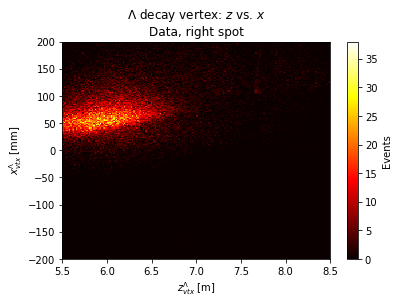

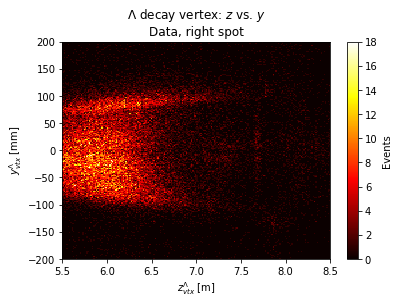

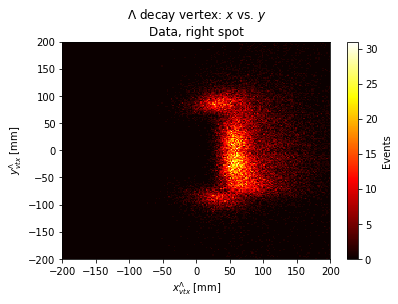

In [38]:
plt.hist2d(df_Data_Spots_Right['L_ENDVERTEX_Z']/1000,
           df_Data_Spots_Right['L_ENDVERTEX_X'],
           bins=200, range=[[5.5,8.5],[-200,200]],
           cmap='hot')
plt.xlabel("$z_{vtx}^\Lambda$ [m]")
plt.ylabel("$x_{vtx}^\Lambda$ [mm]")
plt.title('$\Lambda$ decay vertex: $z$ vs. $x$\nData, right spot')
plt.colorbar(label='Events')
plt.show()

plt.hist2d(df_Data_Spots_Right['L_ENDVERTEX_Z']/1000,
           df_Data_Spots_Right['L_ENDVERTEX_Y'],
           bins=200, range=[[5.5,8.5],[-200,200]],
           cmap='hot')
plt.xlabel("$z_{vtx}^\Lambda$ [m]")
plt.ylabel("$y_{vtx}^\Lambda$ [mm]")
plt.title('$\Lambda$ decay vertex: $z$ vs. $y$\nData, right spot')
plt.colorbar(label='Events')
plt.show()

plt.hist2d(df_Data_Spots_Right['L_ENDVERTEX_X'],
           df_Data_Spots_Right['L_ENDVERTEX_Y'],
           bins=200, range=[[-200,200],[-200,200]],
           cmap='hot')
plt.xlabel("$x_{vtx}^\Lambda$ [mm]")
plt.ylabel("$y_{vtx}^\Lambda$ [mm]")
plt.title('$\Lambda$ decay vertex: $x$ vs. $y$\nData, right spot')
plt.colorbar(label='Events')
plt.show()